# Seção 1

In [1]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.stats import f, studentized_range, norm

In [2]:
def anova_dois_fatores_k1(dados):
    I, J = dados.shape
    SQT = ((dados - dados.mean()) ** 2).sum()
    SQA = J * ((dados.mean(axis=1) - dados.mean())**2).sum()
    SQB = I * ((dados.mean(axis=0) - dados.mean())**2).sum()
    SQE = SQT - SQA - SQB
    
    QME = SQE / ((I-1)*(J-1))
    QMA = SQA / (I - 1)
    QMB = SQB / (J - 1)
    
    fa = QMA/QME
    fb = QMB/QME
    
    cabecalho = ['Fonte de variação','gl','Soma de quadrados','Quadrado médio','f','valor-p']
    tabela = [
        ['fator A',I - 1, SQA.round(2), QMA.round(2), fa.round(2),f.sf(fa,I-1, (I-1)*(J-1)).round(3)],
        ['fator B',J - 1, SQB.round(2), QMB.round(2), fb.round(2),f.sf(fb,J-1, (I-1)*(J-1)).round(3)],
        ['Erro',(I-1)*(J-1),SQE.round(2),QME.round(2),"",""],
        ['total',I * J - 1,SQT.round(2),"",""]
    ]
    
    print(tabulate(tabela,cabecalho,tablefmt='fancy_grid'))

In [3]:
dados = np.array([
    [.97, .48, .48, .46],
    [.77, .14, .22, .25],
    [.67, .39, .57, .19]
])

In [107]:
dados = np.array([
    [64, 49, 50],
    [53, 51, 48],
    [47, 45, 50],
    [51, 43, 52]
])

In [123]:
dados = np.array([
    [.2433, 0.383, .5625, .7258],
    [.159, .2649, .3609, .4773]
])

In [124]:
dados = np.array([
    [54, 46, 51],
    [46, 44, 47],
    [39, 42, 44],
    [44, 37, 43]
])

In [126]:
dados = np.array([
    [105.7, 116.6, 106.6, 113.9, 119.4, 123.5],
    [113.3, 119.9, 120.5, 119.3, 122.5, 124.0],
    [117.2, 124.4, 122.3, 120.0, 115.1, 127.9],
    [110.0, 106.8, 110.0, 115.3, 122.6, 128.3]
])

In [4]:
anova_dois_fatores_k1(dados)

╒═════════════════════╤══════╤═════════════════════╤══════════════════╤═══════╤═══════════╕
│ Fonte de variação   │   gl │   Soma de quadrados │ Quadrado médio   │ f     │ valor-p   │
╞═════════════════════╪══════╪═════════════════════╪══════════════════╪═══════╪═══════════╡
│ fator A             │    2 │                0.13 │ 0.06             │ 4.43  │ 0.066     │
├─────────────────────┼──────┼─────────────────────┼──────────────────┼───────┼───────────┤
│ fator B             │    3 │                0.48 │ 0.16             │ 11.05 │ 0.007     │
├─────────────────────┼──────┼─────────────────────┼──────────────────┼───────┼───────────┤
│ Erro                │    6 │                0.09 │ 0.01             │       │           │
├─────────────────────┼──────┼─────────────────────┼──────────────────┼───────┼───────────┤
│ total               │   11 │                0.69 │                  │       │           │
╘═════════════════════╧══════╧═════════════════════╧══════════════════╧═══════╧═

In [9]:
def graficos_avaliativos_k1(dados):
    dominio = np.arange(dados.shape[1]) + 1
    for i, amostra in enumerate(dados):
        plt.plot(dominio, amostra, label=i+1)
    plt.title("Gráficos e interação")
    plt.xlabel("Níveis de B")
    plt.ylabel("Resposta média")
    plt.legend()
    plt.show()
    
    dados_ajustados = (np.zeros(dados.shape) + dados.mean(axis=0) + dados.mean(axis=1).reshape(-1,1) - dados.mean()).reshape(-1)
    residuos = (dados - dados.mean(axis=0) - dados.mean(axis=1).reshape(-1,1) + dados.mean()).reshape(-1)
    plt.plot(dados_ajustados, residuos, 'o')
    plt.title("Gráfico de variância")
    plt.xlabel("Valor ajustado")
    plt.ylabel("Resíduo")
    antigo = plt.axis()
    plt.plot(antigo[0:2],[0,0],color="black")
    plt.axis(antigo)
    plt.show()
    residuos.sort()
    
    plt.plot(norm.ppf((np.arange(len(residuos)) + 0.5)/len(residuos)).round(2),residuos, 'o')
    plt.title("Gráfico de normalidade dos residuos")
    plt.xlabel("Resíduo")
    plt.ylabel("Percentagem")
    plt.show()

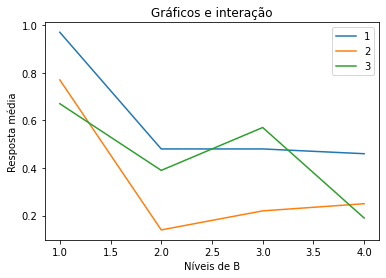

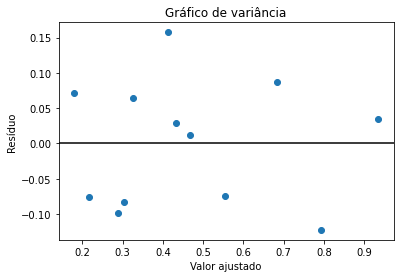

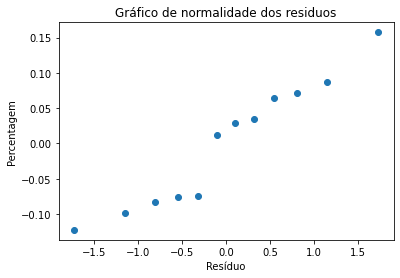

In [10]:
graficos_avaliativos_k1(dados)

In [120]:
f.sf(20.62, 3, 3).round(2)

0.02

In [ ]:
def graficos_avaliativos_kg1(dados):
    dominio = np.arange(dados.shape[1]) + 1
    for i, amostra in enumerate(dados):
        plt.plot(dominio, amostra.mean(axis=1), label=i+1, ms = 5, marker = 'o')
    plt.title("Gráficos e interação")
    plt.xlabel("Níveis de B")
    plt.ylabel("Resposta média")
    plt.legend()
    plt.show()
    
        dados_ajustados = dados.mean(axis=2).repeat(2).reshape(-1)
    residuos = dados.reshape(-1) - dados_ajustados
    plt.plot(dados_ajustados, residuos, 'o')
    plt.title("Gráfico de variância")
    plt.xlabel("Valor ajustado")
    plt.ylabel("Resíduo")
    plt.show()
    residuos.sort()

    plt.plot(norm.ppf((np.arange(len(residuos)) + 0.5)/len(residuos)).round(2),residuos, 'o')
    plt.title("Gráfico de normalidade dos residuos")
    plt.xlabel("Resíduo")
    plt.ylabel("Percentagem")
    plt.show()

In [66]:
dados = np.array([
    [
        [.835, .845],
        [.822, .826],
        [.785, .795]
    ],
    [
        [.855, .865],
        [.832, .836],
        [.790, .800]
    ],
    [
        [.815, .825],
        [.800, .820],
        [.770, .790]
    ]
])

In [3]:
dados = np.array([
    [
        [1, 3],
        [9, 9],
        [7, 9]
    ],
    [
        [7, 9],
        [9, 14],
        [9, 14]
    ],
    [
        [5, 14],
        [14, 12],
        [14, 14]
    ]
])

areia = [0,15,30]
carbono = [0, 0.25, 0.5]
for i, fibra_caborno in enumerate(dados.mean(axis=2).T):
    plt.plot(areia, fibra_caborno, label=carbono[i])
plt.title("Dureza da fundação")
plt.xlabel("Acréscimo de areia")
plt.ylabel("Dureza média amostral")
plt.legend()
plt.show()

In [4]:
def anova_dois_fatores_kg1(dados):
    (I,J,K) = dados.shape
    SQT = ((dados - dados.mean()) ** 2).sum()
    SQE = ((dados - dados.mean(axis=2).repeat(2).reshape(I,J,K)) ** 2).sum()
    SQA = J * K * ((dados.mean(axis=(1,2)) - dados.mean())**2).sum()
    SQB = I * K * ((dados.mean(axis=(0,2)) - dados.mean())**2).sum()
    SQAB = SQT - SQA - SQB - SQE
    
    QMT = SQT/(I * J * K - 1)
    QME = SQE/(I  * J * (K - 1))
    QMA = SQA/(I - 1)
    QMB = SQB/(J - 1)
    QMAB = SQAB/((I-1) * (J-1))
    
    fab = QMAB/QME
    fa = QMA/QME
    fb = QMB/QME
    
    cabecalho = ['Fonte','gl','SQ','QM','f','valor-p']
    tabela = [
        ['fator A',I - 1, SQA.round(7), QMA.round(7), fa.round(2),f.sf(fa,I-1, I * J * (K-1)).round(3)],
        ['fator B',J - 1, SQB.round(7), QMB.round(7), fb.round(2),f.sf(fa,J-1, I * J * (K-1)).round(3)],
        ['interação', (I-1)*(J-1), SQAB.round(7), QMAB.round(7), fab.round(2),f.sf(fab,(I-1)*(J-1), I * J * (K-1)).round(3)],
        ['erro',(I*J*(K-1)),SQE.round(7),QME.round(7),"",""],
        ['total',I*J*K-1,SQT.round(7),"",""]
    ]
    
    print(tabulate(tabela,cabecalho,tablefmt='fancy_grid'))

In [5]:
anova_dois_fatores_kg1(dados)

╒═══════════╤══════╤═══════════╤════════════╤══════╤═══════════╕
│ Fonte     │   gl │        SQ │ QM         │ f    │ valor-p   │
╞═══════════╪══════╪═══════════╪════════════╪══════╪═══════════╡
│ fator A   │    2 │ 106.778   │ 53.3888889 │ 6.54 │ 0.018     │
├───────────┼──────┼───────────┼────────────┼──────┼───────────┤
│ fator B   │    2 │  87.1111  │ 43.5555556 │ 5.33 │ 0.018     │
├───────────┼──────┼───────────┼────────────┼──────┼───────────┤
│ interação │    4 │   8.88889 │ 2.2222222  │ 0.27 │ 0.889     │
├───────────┼──────┼───────────┼────────────┼──────┼───────────┤
│ erro      │    9 │  73.5     │ 8.1666667  │      │           │
├───────────┼──────┼───────────┼────────────┼──────┼───────────┤
│ total     │   17 │ 276.278   │            │      │           │
╘═══════════╧══════╧═══════════╧════════════╧══════╧═══════════╛


In [61]:
studentized_range.isf(0.01, 3, 30)

4.454915058145453

In [19]:
(I,J,K) = 3, 5, 2
SQT = np.array(64954.7)
SQE = np.array(15253.5)
SQA = np.array(22941.8)
SQB = np.array(22765.53)
SQAB = SQT - SQA - SQB - SQE

QMT = SQT/(I * J * K - 1)
QME = SQE/(I  * J * (K - 1))
QMA = SQA/(I - 1)
QMB = SQB/(J - 1)
QMAB = SQAB/((I-1) * (J-1))

fab = QMAB/QME
fa = QMA/QME
fb = QMB/QME

cabecalho = ['Fonte','gl','SQ','QM','f','valor-p']
tabela = [
    ['fator A',I - 1, SQA.round(7), str(QMA.round(7)), fa.round(2),f.sf(fa,I-1, I * J * (K-1)).round(3)],
    ['fator B',J - 1, SQB.round(7), QMB.round(7), fb.round(2),f.sf(fa,J-1, I * J * (K-1)).round(3)],
    ['interação', (I-1)*(J-1), SQAB.round(7), QMAB.round(7), fab.round(2),f.sf(fab,(I-1)*(J-1), I * J * (K-1)).round(3)],
    ['erro',(I*J*(K-1)),SQE.round(7),QME.round(7),"",""],
    ['total',I*J*K-1,SQT.round(7),"",""]
]

print(tabulate(tabela,cabecalho,tablefmt='fancy_grid'))

╒═══════════╤══════╤══════════╤═══════════╤═══════╤═══════════╕
│ Fonte     │   gl │       SQ │ QM        │ f     │ valor-p   │
╞═══════════╪══════╪══════════╪═══════════╪═══════╪═══════════╡
│ fator A   │    2 │ 22941.8  │ 11470.9   │ 11.28 │ 0.001     │
├───────────┼──────┼──────────┼───────────┼───────┼───────────┤
│ fator B   │    4 │ 22765.5  │ 5691.3825 │ 5.6   │ 0.0       │
├───────────┼──────┼──────────┼───────────┼───────┼───────────┤
│ interação │    8 │  3993.87 │ 499.23375 │ 0.49  │ 0.844     │
├───────────┼──────┼──────────┼───────────┼───────┼───────────┤
│ erro      │   15 │ 15253.5  │ 1016.9    │       │           │
├───────────┼──────┼──────────┼───────────┼───────┼───────────┤
│ total     │   29 │ 64954.7  │           │       │           │
╘═══════════╧══════╧══════════╧═══════════╧═══════╧═══════════╛


In [ ]:
for i, amostra in enumerate(dados):
        plt.plot(dominio, amostra, label=i+1)
    plt.title("Gráficos e interação")
    plt.xlabel("Níveis de B")
    plt.ylabel("Resposta média")
    plt.legend()